In [ ]:
 import pandas as pd
import numpy as np

df=pd.read_csv('Cleaned_df.csv')
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_hace2_59.97,saldo_medio_var29_hace2_868.98,saldo_medio_var29_hace2_4838.7,saldo_medio_var29_hace2_10430.01,saldo_medio_var29_ult1_2142.87,saldo_medio_var29_ult1_3365.46,saldo_medio_var29_ult1_13793.67,saldo_medio_var29_ult3_3365.46,saldo_medio_var29_ult3_3490.8,saldo_medio_var29_ult3_7331.34
0,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,37,0,195,195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('TARGET', axis=1)
y = df['TARGET']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


# Training on 80% train, 20% test
print(X_train.shape, X_test.shape)

(60723, 670) (15181, 670)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = df.drop('TARGET', axis=1)
y = df['TARGET']
scale = (y_train == 0).sum() / (y_train == 1).sum()

#using binary logistic
xg_clf = XGBClassifier(scale_pos_weight=scale,learning_rate=0.1, max_depth=3, n_estimators=50, seed=42)

xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:

y_pred = xg_clf.predict(X_test)

In [ ]:
##random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(class_weight=None, max_depth=20, n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

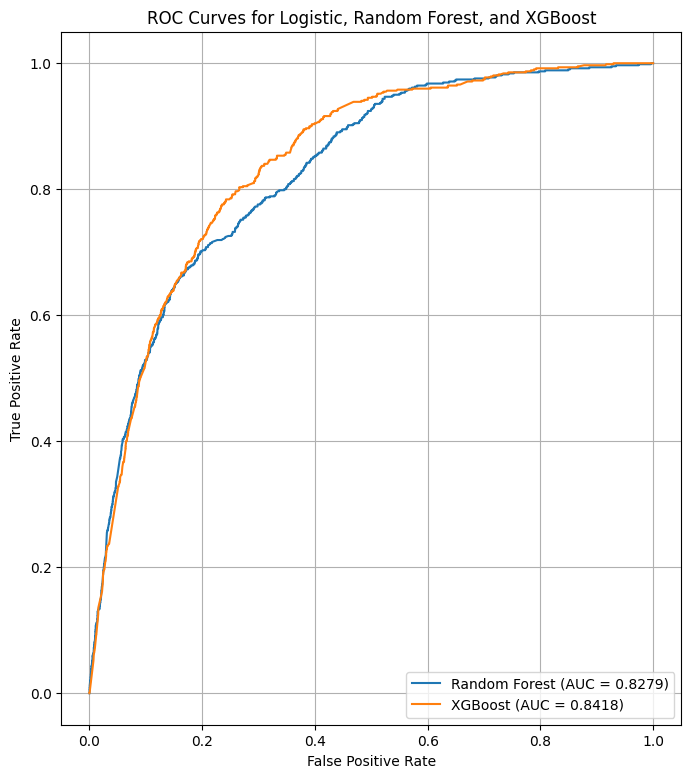

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## For predicting disatisfaction

rf_probs = rf_clf.predict_proba(X_test)[:, 1]
xgb_probs = xg_clf.predict_proba(X_test)[:, 1]


fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)


auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 9))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic, Random Forest, and XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
test_data=pd.read_csv('test.csv')

In [ ]:
test_data.shape

(75818, 370)

In [ ]:
test_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
target_column = 'TARGET'

binary_cols = [col for col in test_data.columns if test_data[col].nunique() == 2 and col != target_column]
categorical_cols = [col for col in test_data.columns if 3 <= test_data[col].nunique() < 10 and col != target_column]
test_data= pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)
test_data=test_data.astype(int)

In [ ]:
train_columns = df.drop('TARGET', axis=1).columns


In [ ]:
df.shape

(75904, 671)

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X_test_final = test_data.reindex(columns=train_columns, fill_value=0)

X_test_final[numeric_cols] = scaler.transform(X_test_final[numeric_cols])

y_probs = xg_clf.predict_proba(X_test_final)[:, 1]

y_pred_binary = (y_probs >= 0.1).astype(int)

submission = pd.DataFrame({
    'ID': test_data['ID'],
    'TARGET': y_pred_binary
})

submission.to_csv('submission.csv', index=False)

In [ ]:
df['TARGET'].value_counts(normalize=True)

,proportion
TARGET,
0,0.960397
1,0.039603


In [ ]:
print((submission['TARGET'] > 0.1).sum())

45394


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

X = df.drop('TARGET', axis=1)
y = df['TARGET']


numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]


X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])


xgb_clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=42)
xgb_clf.fit(X_train, y_train)


y_probs = xgb_clf.predict_proba(X_val)[:, 1]

# Evaluate at different thresholds
for threshold in [0.5, 0.4,0.3,0.2, 0.1]:
    y_pred = (y_probs >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))
    print("AUC:", roc_auc_score(y_val, y_probs))
    print("-" * 30)

    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\n")

#Choosing threshold 0.1

Threshold: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.8372500450780478
------------------------------
Confusion Matrix:
[[14579     1]
 [  601     0]]


Threshold: 0.4
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.8372500450780478
------------------------------
Confusion Matrix:
[[14579     1]
 [  601     0]]


Threshold: 0.3
Precision: 0.25
Recall: 0.0033277870216306157
F1 Score: 0.006568144499178982
AUC: 0.8372500450780478
------------------------------
Confusion Matrix:
[[14574     6]
 [  599     2]]


Threshold: 0.2
Precision: 0.21957671957671956
Recall: 0.13810316139767054
F1 Score: 0.16956077630234934
AUC: 0.8372500450780478
------------------------------
Confusion Matrix:
[[14285   295]
 [  518    83]]


Threshold: 0.1
Precision: 0.1694129763130793
Recall: 0.5474209650582362
F1 Score: 0.2587495084545812
AUC: 0.8372500450780478
------------------------------
Confusion Matrix:
[[12967  1613]
 [  272   329]]


